<a href="https://colab.research.google.com/github/nbarnett19/Computational_Language_Tech/blob/Main/Stage_2_Nina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Accelerating Cleantech Advancements through NLP-Powered Text Mining and Knowledge Extraction:

Stage 2: Training word and sentence embedding models




In this step, students train their own embedding models based on the given dataset and compare the model performance with the open-source embedding models.

> Data Preparation for Embeddings
*   Preprocess the text data for training embeddings, ensuring it is clean and well-structured.
*   Split the data into training and validation sets to assess model performance.

> Word Embedding Training
*   Train word embeddings using techniques like Word2Vec, FastText, or GloVe on the text data.
* Experiment with hyperparameters such as vector dimensions, context window size, and training epochs to optimize word embeddings.

> Sentence Embedding Training
* Develop sentence embeddings using methods like averaging word vectors, Doc2Vec, or
BERT embeddings.
* Fine-tune the sentence embeddings on the cleantech-specific data.
> Embedding Model Evaluation
* Assess the quality of both word and sentence embeddings using intrinsic evaluation methods,
including word similarity and analogy tasks.
* Compare the performance of the in-house embeddings to open source embeddings like Word2Vec, GloVe, or BERT embeddings.

> Transfer Learning with Open Source Models [Optional]
* Implement transfer learning by fine-tuning pre-trained open source models such as BERT or GPT-2 on the text data.
* Compare the performance of transfer learning with the in-house embeddings. This comparison could be done through evaluating the effectiveness of the embeddings in domain-specific tasks like topic classification.

> Outputs:
* Notebook with annotated model training steps.
* Notebook with visualizations comparing the performance of the embedding models.


In [1]:
# Top2Vec Modelling
%%capture
!pip install top2vec
!pip install top2vec[sentence_encoders]
!pip install top2vec[sentence_transformers]
!pip install top2vec[indexing]

# Import Libraries

In [2]:
# Preprocessing
%%capture
!python -m spacy download en_core_web_sm

import numpy as np
import pandas as pd
import nltk
import spacy
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
from gensim.parsing.preprocessing import STOPWORDS
import re

nlp = spacy.load('en_core_web_sm')

In [3]:
# Preprocessing
# Download nltk packages
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

True

In [4]:
# Exploratory Analysis
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction import _stop_words as sklearn_stop_words
from gensim.models.doc2vec import TaggedDocument
from sklearn import preprocessing

In [5]:
# Word2Vec and Doc2Vec
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from gensim.models import Word2Vec
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
from torchtext.data.utils import get_tokenizer
from sklearn.metrics.pairwise import cosine_similarity

# Processing packages
import gensim
from gensim.models import Word2Vec
from gensim import utils
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string
from gensim.test.utils import datapath
from nltk.probability import FreqDist
import random
import copy

In [6]:
# Plots
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

import plotly.graph_objs as go
from plotly.offline import iplot
from IPython.core.interactiveshell import InteractiveShell

pd.options.display.max_colwidth = 100
pd.options.display.max_columns = 30

In [7]:
# Install packages for Top2Vec
%%capture
from top2vec import Top2Vec

# Load the Data

First step is to load our data from the csv file into a dataframe.

In [8]:
!wget https://github.com/nbarnett19/Computational_Language_Tech/raw/Main/cleantech_media_dataset_v1_20231109.zip
!unzip /content/cleantech_media_dataset_v1_20231109.zip

--2023-12-19 19:40:47--  https://github.com/nbarnett19/Computational_Language_Tech/raw/Main/cleantech_media_dataset_v1_20231109.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nbarnett19/Computational_Language_Tech/Main/cleantech_media_dataset_v1_20231109.zip [following]
--2023-12-19 19:40:47--  https://raw.githubusercontent.com/nbarnett19/Computational_Language_Tech/Main/cleantech_media_dataset_v1_20231109.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14880158 (14M) [application/zip]
Saving to: ‘cleantech_media_dataset_v1_20231109.zip’

cleantech_media_dat 100%[===================>]  

In [14]:
df = pd.read_csv("cleantech_media_dataset_v1_20231109.csv")

In [15]:
# Inspect dataframe
pd.DataFrame.head(df)

,Unnamed: 0,title,date,author,content,domain,url
0,1280,Qatar to Slash Emissions as LNG Expansion Advances,2021-01-13,NaN,"[""Qatar Petroleum ( QP) is targeting aggressive cuts in its greenhouse gas emissions as it prepa...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de685b0000
1,1281,India Launches Its First 700 MW PHWR,2021-01-15,NaN,"[""• Nuclear Power Corp. of India Ltd. ( NPCIL) synchronized Kakrapar-3 in the western state of G...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de6c710001
2,1283,New Chapter for US-China Energy Trade,2021-01-20,NaN,"[""New US President Joe Biden took office this week with the US-China relationship at its worst i...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de735a0000
3,1284,Japan: Slow Restarts Cast Doubt on 2030 Energy Plan,2021-01-22,NaN,"[""The slow pace of Japanese reactor restarts continues to cast doubt on the goal of the governme...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de79160000
4,1285,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,NaN,"[""Two of New York City's largest pension funds say they will divest roughly $ 4 billion in share...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de7d9e0000


In [16]:
# Inspect dataframe shape
df.shape

(9607, 7)

The dataframe contains 9607 records and 7 attributes.

In [17]:
# Check for NAs
print(df.isnull().sum())

Unnamed: 0       0
title            0
date             0
author        9576
content          0
domain           0
url              0
dtype: int64


There are no NAs in the title or content columns which are the most important for topic modelling. We can also see that the author column has almost no data so we can drop this column.

# Preprocessing

We create a function to apply the first preprocessing steps. This includes dropping any duplicated records, changing the contents to lower case, removing non alpha-numeric characters, tokenizing the contents and adding a word count.

In [18]:
def preprocess_data(df):
    # Remove duplicates
    df = df.drop_duplicates()

    # Remove digits << Added because the tokenized numbers do not bring value to our analysis
    df['content_cleaned'] = df['content'].str.replace('\d+', '', regex=True)

    # Convert content to lower case
    df['content_cleaned'] = df['content_cleaned'].apply(lambda x: x.lower())

    # Remove symbols, but keep punctuation for sentence tokenization
    df['content_cleaned_sent'] = df['content_cleaned'].apply(lambda x: re.sub(r"[^a-zA-Z0-9.!?]+", r" ", x))

    # Remove symbols and punctuation
    df['content_cleaned'] = df['content_cleaned'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

    # Tokenize
    df['tokenized_content'] = df['content_cleaned'].apply(lambda x: nltk.word_tokenize(x))

    # Remove digits << Added because the tokenized numbers do not bring value to our analysis
    df['tokenized_content'] = df['tokenized_content'].replace('[0-9]+', '', regex=True)

    # Add word count column
    df['word_count'] = df['tokenized_content'].apply(lambda x: len(x))

    # Remove unused columns
    df.drop('Unnamed: 0', axis=1, inplace=True)
    df.drop('author', axis=1, inplace=True)

    return df

df = preprocess_data(df)

In [19]:
df[['content_cleaned', 'tokenized_content', 'word_count']].head()

,content_cleaned,tokenized_content,word_count
0,qatar petroleum qp is targeting aggressive cuts in its greenhouse gas emissions as it prepares ...,"[qatar, petroleum, qp, is, targeting, aggressive, cuts, in, its, greenhouse, gas, emissions, as,...",415
1,nuclear power corp of india ltd npcil synchronized kakrapar in the western state of gujarat to...,"[nuclear, power, corp, of, india, ltd, npcil, synchronized, kakrapar, in, the, western, state, o...",518
2,new us president joe biden took office this week with the uschina relationship at its worst in d...,"[new, us, president, joe, biden, took, office, this, week, with, the, uschina, relationship, at,...",679
3,the slow pace of japanese reactor restarts continues to cast doubt on the goal of the government...,"[the, slow, pace, of, japanese, reactor, restarts, continues, to, cast, doubt, on, the, goal, of...",663
4,two of new york citys largest pension funds say they will divest roughly billion in shares of ...,"[two, of, new, york, citys, largest, pension, funds, say, they, will, divest, roughly, billion, ...",384


Lemmatize tokens

In [30]:
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])


def lemmatize_tokens(token_list):
    # Join the tokens back into a string
    joined_tokens = ' '.join(token_list)
    # Process the text with spacy
    doc = nlp(joined_tokens)
    # Return the lemmatized tokens
    return [token.lemma_ for token in doc]

# Apply the lemmatization function to the 'tokenized_content' column
spacy_lemma = df['tokenized_content'].apply(lemmatize_tokens)
spacy_lemma

0       [qatar, petroleum, qp, be, target, aggressive, cut, in, its, greenhouse, gas, emission, as, it, ...
1       [nuclear, power, corp, of, india, ltd, npcil, synchronize, kakrapar, in, the, western, state, of...
2       [new, us, president, joe, biden, take, office, this, week, with, the, uschina, relationship, at,...
3       [the, slow, pace, of, japanese, reactor, restart, continue, to, cast, doubt, on, the, goal, of, ...
4       [two, of, new, york, city, large, pension, fund, say, they, will, divest, roughly, billion, in, ...
                                                       ...                                                 
9602    [strata, clean, energy, have, close, a, million, revolving, loan, and, letter, of, credit, facil...
9603    [global, renewable, energy, developer, rste, be, deploy, sparkcognition, s, renewable, suite, ac...
9604    [veolia, north, america, a, provider, of, environmental, solution, in, the, us, and, canada, hav...
9605    [once, the, selfproc

In [31]:
df['spacy_lemma'] = spacy_lemma

In [32]:
# Remove stops
stop_words_spacy = nlp.Defaults.stop_words
stops_spacy = df['spacy_lemma'].apply(lambda x: [word for word in x if word.lower() not in stop_words_spacy])
print(len(stops_spacy[0]))

232


In [33]:
df['stops_spacy'] = stops_spacy
df.head()

,title,date,content,domain,url,content_cleaned,content_cleaned_sent,tokenized_content,word_count,spacy_lemma,stops_spacy
0,Qatar to Slash Emissions as LNG Expansion Advances,2021-01-13,"[""Qatar Petroleum ( QP) is targeting aggressive cuts in its greenhouse gas emissions as it prepa...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de685b0000,qatar petroleum qp is targeting aggressive cuts in its greenhouse gas emissions as it prepares ...,qatar petroleum qp is targeting aggressive cuts in its greenhouse gas emissions as it prepares ...,"[qatar, petroleum, qp, is, targeting, aggressive, cuts, in, its, greenhouse, gas, emissions, as,...",415,"[qatar, petroleum, qp, be, target, aggressive, cut, in, its, greenhouse, gas, emission, as, it, ...","[qatar, petroleum, qp, target, aggressive, cut, greenhouse, gas, emission, prepare, launch, phas..."
1,India Launches Its First 700 MW PHWR,2021-01-15,"[""• Nuclear Power Corp. of India Ltd. ( NPCIL) synchronized Kakrapar-3 in the western state of G...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de6c710001,nuclear power corp of india ltd npcil synchronized kakrapar in the western state of gujarat to...,nuclear power corp. of india ltd. npcil synchronized kakrapar in the western state of gujarat t...,"[nuclear, power, corp, of, india, ltd, npcil, synchronized, kakrapar, in, the, western, state, o...",518,"[nuclear, power, corp, of, india, ltd, npcil, synchronize, kakrapar, in, the, western, state, of...","[nuclear, power, corp, india, ltd, npcil, synchronize, kakrapar, western, state, gujarat, grid, ..."
2,New Chapter for US-China Energy Trade,2021-01-20,"[""New US President Joe Biden took office this week with the US-China relationship at its worst i...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de735a0000,new us president joe biden took office this week with the uschina relationship at its worst in d...,new us president joe biden took office this week with the us china relationship at its worst in...,"[new, us, president, joe, biden, took, office, this, week, with, the, uschina, relationship, at,...",679,"[new, us, president, joe, biden, take, office, this, week, with, the, uschina, relationship, at,...","[new, president, joe, biden, office, week, uschina, relationship, bad, decade, energy, come, pla..."
3,Japan: Slow Restarts Cast Doubt on 2030 Energy Plan,2021-01-22,"[""The slow pace of Japanese reactor restarts continues to cast doubt on the goal of the governme...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de79160000,the slow pace of japanese reactor restarts continues to cast doubt on the goal of the government...,the slow pace of japanese reactor restarts continues to cast doubt on the goal of the governmen...,"[the, slow, pace, of, japanese, reactor, restarts, continues, to, cast, doubt, on, the, goal, of...",663,"[the, slow, pace, of, japanese, reactor, restart, continue, to, cast, doubt, on, the, goal, of, ...","[slow, pace, japanese, reactor, restart, continue, cast, doubt, goal, government, fifth, basic, ..."
4,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,"[""Two of New York City's largest pension funds say they will divest roughly $ 4 billion in share...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de7d9e0000,two of new york citys largest pension funds say they will divest roughly billion in shares of ...,two of new york city s largest pension funds say they will divest roughly billion in shares of ...,"[two, of, new, york, citys, largest, pension, funds, say, they, will, divest, roughly, billion, ...",384,"[two, of, new, york, city, large, pension, fund, say, they, will, divest, roughly, billion, in, ...","[new, york, city, large, pension, fund, divest, roughly, billion, share, fossil, fuel, company, ..."


In [34]:
# Join text for each doc
df['final_cleaned'] = df['stops_spacy'].apply(lambda x: ' '.join(x))

# Topic Labeling

From stage 1, we identified 8 topics that will be used in our topic classification model. Below we will rerun the top2vec model and assign the topics to the cleantech corpus.

In [35]:
documents = df["content"].tolist()
model2 = Top2Vec(documents, embedding_model='universal-sentence-encoder-multilingual')

INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

INFO:top2vec:Downloading universal-sentence-encoder-multilingual model
INFO:top2vec:Creating joint document/word embedding
INFO:top2vec:Creating lower dimension embedding of documents
INFO:top2vec:Finding dense areas of documents
INFO:top2vec:Finding topics


In [36]:
# Get topics
topics = model2.get_topics()

In [37]:
model2.hierarchical_topic_reduction(num_topics=8)

[[2, 19, 22, 43, 0],
 [6, 20, 13, 1],
 [45, 25, 12, 16, 17, 14, 47, 46, 28],
 [58, 8, 36, 32, 26, 31, 44, 54, 4],
 [29, 40, 5, 30, 49, 34, 39, 38, 27, 48, 11],
 [15, 7, 55, 21, 35, 3],
 [9, 56, 57, 42, 23, 10],
 [41, 53, 18, 33, 37, 51, 50, 52, 24]]

In [38]:
# # Creating a dataframe with topic numbers and topic words
# Get the topic numbers and words and scores for a specific topic
topic_sizes, topic_nums = model2.get_topic_sizes(reduced=True)
topic_words, word_scores, topic_num = model2.get_topics(len(topic_nums))

# Create an empty list to store the results
topics_data = []

# Iterate over topics
for i in range(len(topic_nums)):
    # Get words, word scores, and topic number for the current topic
    current_topic_words, current_word_scores, current_topic_num = model2.get_topics()
    # Append the information for the current topic to the list
    # Words scores were excluded from the data frame because it did not add value to the analysis
    topics_data.append({'topic_nums': current_topic_num[i], 'topic_sizes': topic_sizes[i], 'topic_words': current_topic_words[i]})

# Create a DataFrame from the list of dictionaries
topics_df = pd.DataFrame(topics_data)

# Display the results DataFrame
topics_df

,topic_nums,topic_sizes,topic_words
0,0,1635,"[solar, solarpower, solarapp, solarize, agrivoltaic, photovoltaic, solaredge, agrivoltaics, geoe..."
1,1,1492,"[environmentally, environmental, greenpeace, ecological, eco, environment, greentech, geoenergy,..."
2,2,1344,"[geothermal, geoenergy, hydrothermal, thinkgeoenergy, bioenergy, energies, energie, energy, geos..."
3,3,1297,"[solar, solarpower, agrivoltaic, agrivoltaics, solarapp, solarize, photovoltaic, terawatt, geoen..."
4,4,1242,"[solar, solarpower, agrivoltaic, solarapp, solarize, agrivoltaics, photovoltaic, photovoltaics, ..."
5,5,1078,"[renewables, geoenergy, hydrogen, biofuels, bioenergy, hydropower, hydrocarbons, biofuel, hydroc..."
6,6,869,"[climatic, greenpeace, environmentally, environmental, ecological, climate, climates, ecology, e..."
7,7,650,"[geoenergy, renewables, energies, energie, thinkgeoenergy, bioenergy, solarpower, totalenergies,..."


In [39]:
# # Creating a dataframe with documents assigned to the topics and document scores
# Get the topic sizes and topic numbers
topic_sizes, topic_nums = model2.get_topic_sizes(reduced = True)

# Create an empty DataFrame to store the results
results_df2 = pd.DataFrame(columns=['topic', 'document_ids','document_scores'])

# Iterate over topics
for i in range(len(topic_sizes)):
    # Get documents, document scores, and document IDs for the current topic
    documents, document_scores, document_ids = model2.search_documents_by_topic(reduced = True, topic_num=i, num_docs=topic_sizes[i])

    # Create a DataFrame for the current topic
    topic_df = pd.DataFrame({'topic': i, 'document_ids': document_ids, 'document_scores': document_scores})

    # Append the DataFrame for the current topic to the results DataFrame
    results_df2 = pd.concat([results_df2, topic_df], ignore_index=True)

# Display the results DataFrame
results_df2

,topic,document_ids,document_scores
0,0,8986,0.873710
1,0,4749,0.869657
2,0,9597,0.863251
3,0,9018,0.860807
4,0,9049,0.860193
...,...,...,...
9602,7,237,0.484661
9603,7,2267,0.473551
9604,7,352,0.456060
9605,7,2616,0.357504


Assign the documents to the identified topics.

In [40]:
# the index of each document in the original corpus is the id
# Therefor we can simply join the two dataframes on the index to assign the topics

# Merge DataFrames on the index of df and the document ids from results_df2 column
df_labeled = pd.merge(df, results_df2, left_index=True, right_on='document_ids', how='inner')

In [41]:
# Merge DataFrames on the 'ID' column
df_labeled

,title,date,content,domain,url,content_cleaned,content_cleaned_sent,tokenized_content,word_count,spacy_lemma,stops_spacy,final_cleaned,topic,document_ids,document_scores
3795,Qatar to Slash Emissions as LNG Expansion Advances,2021-01-13,"[""Qatar Petroleum ( QP) is targeting aggressive cuts in its greenhouse gas emissions as it prepa...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de685b0000,qatar petroleum qp is targeting aggressive cuts in its greenhouse gas emissions as it prepares ...,qatar petroleum qp is targeting aggressive cuts in its greenhouse gas emissions as it prepares ...,"[qatar, petroleum, qp, is, targeting, aggressive, cuts, in, its, greenhouse, gas, emissions, as,...",415,"[qatar, petroleum, qp, be, target, aggressive, cut, in, its, greenhouse, gas, emission, as, it, ...","[qatar, petroleum, qp, target, aggressive, cut, greenhouse, gas, emission, prepare, launch, phas...",qatar petroleum qp target aggressive cut greenhouse gas emission prepare launch phase plan milli...,2,0,0.740577
3610,India Launches Its First 700 MW PHWR,2021-01-15,"[""• Nuclear Power Corp. of India Ltd. ( NPCIL) synchronized Kakrapar-3 in the western state of G...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de6c710001,nuclear power corp of india ltd npcil synchronized kakrapar in the western state of gujarat to...,nuclear power corp. of india ltd. npcil synchronized kakrapar in the western state of gujarat t...,"[nuclear, power, corp, of, india, ltd, npcil, synchronized, kakrapar, in, the, western, state, o...",518,"[nuclear, power, corp, of, india, ltd, npcil, synchronize, kakrapar, in, the, western, state, of...","[nuclear, power, corp, india, ltd, npcil, synchronize, kakrapar, western, state, gujarat, grid, ...",nuclear power corp india ltd npcil synchronize kakrapar western state gujarat grid jan indias me...,2,1,0.764740
9562,New Chapter for US-China Energy Trade,2021-01-20,"[""New US President Joe Biden took office this week with the US-China relationship at its worst i...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de735a0000,new us president joe biden took office this week with the uschina relationship at its worst in d...,new us president joe biden took office this week with the us china relationship at its worst in...,"[new, us, president, joe, biden, took, office, this, week, with, the, uschina, relationship, at,...",679,"[new, us, president, joe, biden, take, office, this, week, with, the, uschina, relationship, at,...","[new, president, joe, biden, office, week, uschina, relationship, bad, decade, energy, come, pla...",new president joe biden office week uschina relationship bad decade energy come play big role re...,7,2,0.648208
4403,Japan: Slow Restarts Cast Doubt on 2030 Energy Plan,2021-01-22,"[""The slow pace of Japanese reactor restarts continues to cast doubt on the goal of the governme...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de79160000,the slow pace of japanese reactor restarts continues to cast doubt on the goal of the government...,the slow pace of japanese reactor restarts continues to cast doubt on the goal of the governmen...,"[the, slow, pace, of, japanese, reactor, restarts, continues, to, cast, doubt, on, the, goal, of...",663,"[the, slow, pace, of, japanese, reactor, restart, continue, to, cast, doubt, on, the, goal, of, ...","[slow, pace, japanese, reactor, restart, continue, cast, doubt, goal, government, fifth, basic, ...",slow pace japanese reactor restart continue cast doubt goal government fifth basic energy plan l...,2,3,0.594374
4189,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,"[""Two of New York City's largest pension funds say they will divest roughly $ 4 billion in share...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de7d9e0000,two of new york citys largest pension funds say they will divest roughly billion in shares of ...,two of new york city s largest pension fun

# Word Embeddings


In [42]:
df.head()

,title,date,content,domain,url,content_cleaned,content_cleaned_sent,tokenized_content,word_count,spacy_lemma,stops_spacy,final_cleaned
0,Qatar to Slash Emissions as LNG Expansion Advances,2021-01-13,"[""Qatar Petroleum ( QP) is targeting aggressive cuts in its greenhouse gas emissions as it prepa...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de685b0000,qatar petroleum qp is targeting aggressive cuts in its greenhouse gas emissions as it prepares ...,qatar petroleum qp is targeting aggressive cuts in its greenhouse gas emissions as it prepares ...,"[qatar, petroleum, qp, is, targeting, aggressive, cuts, in, its, greenhouse, gas, emissions, as,...",415,"[qatar, petroleum, qp, be, target, aggressive, cut, in, its, greenhouse, gas, emission, as, it, ...","[qatar, petroleum, qp, target, aggressive, cut, greenhouse, gas, emission, prepare, launch, phas...",qatar petroleum qp target aggressive cut greenhouse gas emission prepare launch phase plan milli...
1,India Launches Its First 700 MW PHWR,2021-01-15,"[""• Nuclear Power Corp. of India Ltd. ( NPCIL) synchronized Kakrapar-3 in the western state of G...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de6c710001,nuclear power corp of india ltd npcil synchronized kakrapar in the western state of gujarat to...,nuclear power corp. of india ltd. npcil synchronized kakrapar in the western state of gujarat t...,"[nuclear, power, corp, of, india, ltd, npcil, synchronized, kakrapar, in, the, western, state, o...",518,"[nuclear, power, corp, of, india, ltd, npcil, synchronize, kakrapar, in, the, western, state, of...","[nuclear, power, corp, india, ltd, npcil, synchronize, kakrapar, western, state, gujarat, grid, ...",nuclear power corp india ltd npcil synchronize kakrapar western state gujarat grid jan indias me...
2,New Chapter for US-China Energy Trade,2021-01-20,"[""New US President Joe Biden took office this week with the US-China relationship at its worst i...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de735a0000,new us president joe biden took office this week with the uschina relationship at its worst in d...,new us president joe biden took office this week with the us china relationship at its worst in...,"[new, us, president, joe, biden, took, office, this, week, with, the, uschina, relationship, at,...",679,"[new, us, president, joe, biden, take, office, this, week, with, the, uschina, relationship, at,...","[new, president, joe, biden, office, week, uschina, relationship, bad, decade, energy, come, pla...",new president joe biden office week uschina relationship bad decade energy come play big role re...
3,Japan: Slow Restarts Cast Doubt on 2030 Energy Plan,2021-01-22,"[""The slow pace of Japanese reactor restarts continues to cast doubt on the goal of the governme...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de79160000,the slow pace of japanese reactor restarts continues to cast doubt on the goal of the government...,the slow pace of japanese reactor restarts continues to cast doubt on the goal of the governmen...,"[the, slow, pace, of, japanese, reactor, restarts, continues, to, cast, doubt, on, the, goal, of...",663,"[the, slow, pace, of, japanese, reactor, restart, continue, to, cast, doubt, on, the, goal, of, ...","[slow, pace, japanese, reactor, restart, continue, cast, doubt, goal, government, fifth, basic, ...",slow pace japanese reactor restart continue cast doubt goal government fifth basic energy plan l...
4,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,"[""Two of New York City's largest pension funds say they will divest roughly $ 4 billion in share...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de7d9e0000,two of new york citys largest pension funds say they will divest roughly billion in shares of ...,two of new york city s largest pension funds say they will divest roughly billion in shares of ...,"[two, of, new, york, citys, largest, pension

## Word2Vec Embedding

In [43]:
sentences = df['stops_spacy']

In [44]:
# ensure the data is a list of words.
sentences

0       [qatar, petroleum, qp, target, aggressive, cut, greenhouse, gas, emission, prepare, launch, phas...
1       [nuclear, power, corp, india, ltd, npcil, synchronize, kakrapar, western, state, gujarat, grid, ...
2       [new, president, joe, biden, office, week, uschina, relationship, bad, decade, energy, come, pla...
3       [slow, pace, japanese, reactor, restart, continue, cast, doubt, goal, government, fifth, basic, ...
4       [new, york, city, large, pension, fund, divest, roughly, billion, share, fossil, fuel, company, ...
                                                       ...                                                 
9602    [strata, clean, energy, close, million, revolving, loan, letter, credit, facility, expand, opera...
9603    [global, renewable, energy, developer, rste, deploy, sparkcognition, s, renewable, suite, gw, la...
9604    [veolia, north, america, provider, environmental, solution, canada, partner, today, s, power, in...
9605    [selfproclaime, lead

In [45]:
# Set seeds for reproducibility
SEED = 37
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

data = copy.deepcopy(sentences)

# We define how to split the data
split_train = int(len(data) * 0.8)
split_val = (len(data) - split_train) // 2
split_test = len(data) - split_train - split_val

train_data = data[:split_train]
data = data[split_train:]

val_data = data[:split_val]
data = data[split_val:]

test_data = data

# Sanity check
assert len(train_data + val_data + test_data) == len(sentences)
print(len(train_data), len(val_data), len(test_data))

7685 961 961


In [46]:
# min_count = removes words with a frequency less than listed
# Vector size = the number of dimensions that gensim Word2Vec maps the words into. Bigger size requires more training data, but can lead to better models
# Workers = parallelization to speeed up training
min_count = 5
vector_size = 200
workers=4

model = gensim.models.Word2Vec(sentences=train_data, min_count=min_count,
                               vector_size=vector_size,workers=workers,
                               compute_loss=True, seed = 55, epochs=50 )

In [47]:
# getting the training loss value
training_loss = model.get_latest_training_loss()
print(training_loss)

35634352.0


Show the model works by obtaining a vector from a common word in the model.

In [48]:
vec_energy = model.wv['energy']
vec_energy

array([ 1.8765486 ,  0.5742412 , -1.3724011 , -0.42324787, -0.32913315,
        0.43308717,  0.5214758 ,  0.7595095 ,  0.5974092 , -0.04394234,
        0.29088387,  1.7592251 , -0.18044916,  0.6129367 , -0.83305836,
        2.1534805 ,  0.32912368,  0.08730684,  1.6351051 ,  0.40279275,
       -0.32000428, -0.9608247 ,  1.1580188 , -2.0894    , -1.5884372 ,
        0.94451207,  1.031967  , -0.25972694, -0.4813481 , -1.7006558 ,
        1.4227715 ,  1.037355  ,  1.8101223 , -0.26562014,  1.177542  ,
        1.1646277 , -0.19865336,  0.24961033,  1.2698961 , -1.896544  ,
        0.01469298, -2.3935199 , -1.270775  , -1.9368095 , -0.69783825,
       -0.06918041,  0.9040104 , -1.9438233 ,  2.2158868 , -0.1440731 ,
       -0.04240809, -0.6156172 , -1.8188239 , -0.962985  , -1.8236661 ,
        0.55904835,  1.0203818 ,  0.6863909 , -1.51793   , -1.5856857 ,
       -3.0388935 ,  3.0912557 ,  1.9631402 ,  0.34587875, -0.95428205,
       -1.9838691 , -1.4000767 ,  1.7432705 , -0.32081395,  1.33

Retrieve Vocabulary Words

In [49]:
for index, word in enumerate(model.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(model.wv.index_to_key)} is {word}")

word #0/21428 is energy
word #1/21428 is s
word #2/21428 is use
word #3/21428 is gas
word #4/21428 is project
word #5/21428 is new
word #6/21428 is year
word #7/21428 is power
word #8/21428 is solar
word #9/21428 is technology


Word2Vec supports word similarity tasks.

In [50]:
pairs = [
    ('energy', 'electricity'),
    ('energy', 'solar'),
    ('energy', 'gas'),
    ('energy', 'clean'),
    ('energy', 'climate'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, model.wv.similarity(w1, w2)))

'energy'	'electricity'	0.58
'energy'	'solar'	0.30
'energy'	'gas'	0.28
'energy'	'clean'	0.21
'energy'	'climate'	0.16


In [51]:
# 5 most similar words to energy
model.wv.most_similar(positive=['energy'], topn=5)

[('power', 0.6054549217224121),
 ('electricity', 0.5790684223175049),
 ('intermittent', 0.4356303811073303),
 ('hydrogen', 0.4001680314540863),
 ('technology', 0.3940718472003937)]

In [52]:
# Which word does not belong in the sequence
print(model.wv.doesnt_match(['energy', 'solar', 'wind', 'water', 'electricity', 'president']))

president


We can evaluate the effectiveness of Word2Vec with word analogy or word pair mthods. Word analogies evaluates the model on a set of syntactic and semantic word analogies. The output is a tuple containing a total accuracy and a list of dictionaries for each section with correct and incorrect analogies. Word similarity evaluates the model on a dataset containing word pairs with human-assigned similarity judgments. The output includes the correlation coefficient and p-value.

In [54]:
# Word Analogy Evaluation
analogies = model.wv.evaluate_word_analogies(datapath('questions-words.txt'))
print("Analogies Score:", analogies[0])

Analogies Score: 0.12654392915404333


In [55]:
# Word Similarity Evaluation
model.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))

(PearsonRResult(statistic=0.40145172063000484, pvalue=1.0749937122516852e-12),
 SignificanceResult(statistic=0.41075476420454604, pvalue=2.8444256787373075e-13),
 17.56373937677054)

* Pearson correlation coefficient: 0.41519180153657675
* Significance: p-value = 1.4867188725644225e-13 (very close to zero)
* Spearman rank-order correlation coefficient: 0.43021345396803157
* Coverage: 17.56% (percentage of word pairs covered by the model)

The Pearson correlation coefficient measures the linear relationship between the model's similarity scores and the human similarity judgments. In this case, the low p-value suggests that the correlation is statistically significant.

The Spearman rank-order correlation measures how consistently two sets of rankings are related. A higher Spearman coefficient indicates a better performance in capturing the ordinal relationships.

The coverage indicates the percentage of word pairs from the evaluation set that are present in the model's vocabulary.

Overall, these metrics provide insights into how well the Word2Vec model aligns with human judgments of word similarity.

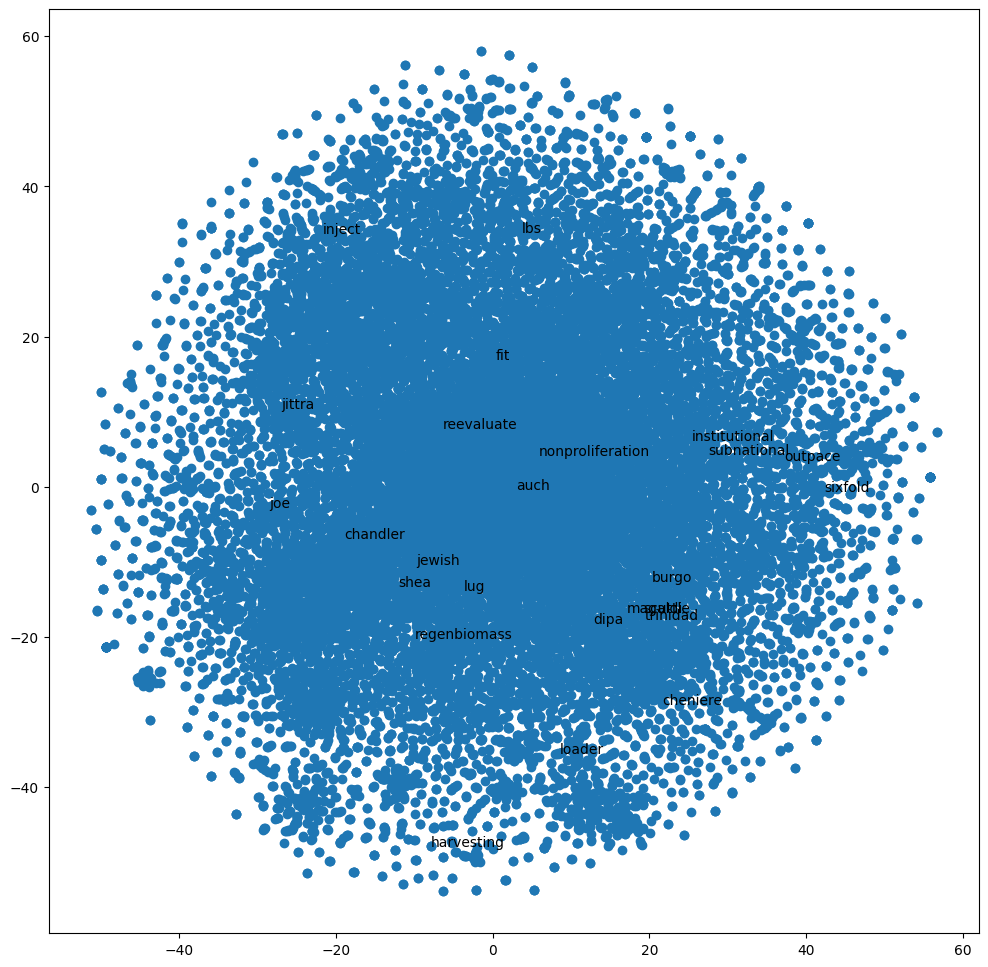

In [56]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import random
import numpy as np

def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

x_vals, y_vals, labels = reduce_dimensions(model)

plt.figure(figsize=(12, 12))
plt.scatter(x_vals, y_vals)

# Label randomly subsampled 25 data points
indices = list(range(len(labels)))
selected_indices = random.sample(indices, 25)
for i in selected_indices:
    plt.annotate(labels[i], (x_vals[i], y_vals[i]))

plt.show()


Build a new model using skip-gram.

In [57]:
# min_count = removes words with a frequency less than listed
# Vector size = the number of dimensions that gensim Word2Vec maps the words into. Bigger size requires more training data, but can lead to better models
# Workers = parallelization to speeed up training
min_count = 5
vector_size = 200
workers=4

model = gensim.models.Word2Vec(sentences=train_data, min_count=min_count,
                               vector_size=vector_size,workers=workers,
                               compute_loss=True, seed = 72, sg=1, hs=0, epochs=50 )

In [ ]:
# getting the training loss value
training_loss = model.get_latest_training_loss()
print(training_loss)

In [ ]:
pairs = [
    ('energy', 'electricity'),
    ('energy', 'solar'),
    ('energy', 'gas'),
    ('energy', 'clean'),
    ('energy', 'climate'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, model.wv.similarity(w1, w2)))

In [ ]:
# 5 most similar words to energy
model.wv.most_similar(positive=['energy'], topn=5)

In [ ]:
# Word Analogy Evaluation
analogies = model.wv.evaluate_word_analogies(datapath('questions-words.txt'))
print("Analogies Score:", analogies[0])

In [ ]:
# Word Similarity Evaluation
model.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))

* Pearson correlation coefficient: 0.41225004262668175
* Significance: p-value = 2.2882532293753467e-13 (very close to zero)
* Spearman rank-order correlation coefficient: 0.46687706846402177
* Coverage: 17.56% (percentage of word pairs covered by the model)

The Pearson correlation coefficient measures the linear relationship between the model's similarity scores and the human similarity judgments. In this case, the low p-value suggests that the correlation is statistically significant.

The Spearman rank-order correlation measures how consistently two sets of rankings are related. A higher Spearman coefficient indicates a better performance in capturing the ordinal relationships.

The coverage indicates the percentage of word pairs from the evaluation set that are present in the model's vocabulary.

Overall, these metrics show a slight improvement from the CBOW word2vec model.

The word embeddings made by the model can be visualised by reducing dimensionality of the words to 2 dimensions using tSNE.

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import random
import numpy as np

def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

x_vals, y_vals, labels = reduce_dimensions(model)

plt.figure(figsize=(12, 12))
plt.scatter(x_vals, y_vals)

# Label randomly subsampled 25 data points
indices = list(range(len(labels)))
selected_indices = random.sample(indices, 25)
for i in selected_indices:
    plt.annotate(labels[i], (x_vals[i], y_vals[i]))

plt.show()


RNN classification

In [ ]:
# # Complete the RNN class
# class RNNModel(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, num_classes):
#         super(RNNModel, self).__init__()
#         self.hidden_size = hidden_size
#         self.num_layers = num_layers
#         self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
#         self.fc = nn.Linear(hidden_size, num_classes)
#     def forward(self, x):
#         h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
#         out, _ = self.rnn(x, h0)
#         out = out[:, -1, :]
#         out = self.fc(out)
#         return out

# # Initialize the model
# rnn_model = RNNModel(input_size, hidden_size, num_layers, num_classes)
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(rnn_model.parameters(), lr=0.01)

# # Train the model for ten epochs and zero the gradients
# for epoch in range(10):
#     optimizer.zero_grad()
#     outputs = rnn_model(X_train_seq)
#     loss = criterion(outputs, y_train_seq)
#     loss.backward()
#     optimizer.step()
#     print(f'Epoch: {epoch+1}, Loss: {loss.item()}')

Building an LSTM model

In [ ]:
# # Initialize the LSTM and the output layer with parameters
# class LSTMModel(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, num_classes):
#         super(LSTMModel, self).__init__()
#         self.hidden_size = hidden_size
#         self.num_layers = num_layers
#         self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
#         self.fc = nn.Linear(hidden_size, num_classes)
#     def forward(self, x):
#         h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
#         c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
#         out, _ = self.lstm(x, (h0, c0))
#         out = out[:, -1, :]
#         out = self.fc(out)
#         return out

# # Initialize model with required parameters
# lstm_model = LSTMModel(input_size, hidden_size, num_layers, num_classes)
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(lstm_model.parameters(), lr=0.01)

# # Train the model by passing the correct parameters and zeroing the gradient
# for epoch in range(10):
#     optimizer.zero_grad()
#     outputs = lstm_model(X_train_seq)
#     loss = criterion(outputs, y_train_seq)
#     loss.backward()
#     optimizer.step()
#     print(f'Epoch: {epoch+1}, Loss: {loss.item()}')

Building a GRU Model

In [ ]:
# # Complete the GRU model
# class GRUModel(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, num_classes):
#         super(GRUModel, self).__init__()
#         self.hidden_size = hidden_size
#         self.num_layers = num_layers
#         self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
#         self.fc = nn.Linear(hidden_size, num_classes)
#     def forward(self, x):
#         h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
#         out, _ = self.gru(x, h0)
#         out = out[:, -1, :]
#         out = self.fc(out)
#         return out

# # Initialize the model
# gru_model = GRUModel(input_size, hidden_size, num_layers, num_classes)
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(gru_model.parameters(), lr=0.01)

# # Train the model and backpropagate the loss after initialization
# for epoch in range(15):
#     optimizer.zero_grad()
#     outputs = gru_model(X_train_seq)
#     loss = criterion(outputs, y_train_seq)
#     loss.backward()
#     optimizer.step()
#     print(f'Epoch: {epoch+1}, Loss: {loss.item()}')

Evaluate RNN model

In [ ]:
# # Create an instance of the metrics
# accuracy = Accuracy(task="multiclass", num_classes=3)
# precision = Precision(task="multiclass", num_classes=3)
# recall = Recall(task="multiclass", num_classes=3)
# f1 = F1Score(task="multiclass", num_classes=3)

# # Generate the predictions
# outputs = rnn_model(X_test_seq)
# _, predicted = torch.max(outputs, 1)

# # Calculate the metrics
# accuracy_score = accuracy(predicted, y_test_seq)
# precision_score = precision(predicted, y_test_seq)
# recall_score = recall(predicted, y_test_seq)
# f1_score = f1(predicted, y_test_seq)
# print("RNN Model - Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}".format(accuracy_score, precision_score, recall_score, f1_score))

Evaluate LSTM and GRU

In [ ]:
# # Create an instance of the metrics
# accuracy = Accuracy(task="multiclass", num_classes=3)
# precision = Precision(task="multiclass", num_classes=3)
# recall = Recall(task="multiclass", num_classes=3)
# f1 = F1Score(task="multiclass", num_classes=3)

# # Calculate metrics for the LSTM model
# accuracy_1 = accuracy(y_pred_lstm, y_test)
# precision_1 = precision(y_pred_lstm, y_test)
# recall_1 = recall(y_pred_lstm, y_test)
# f1_1 = f1(y_pred_lstm, y_test)
# print("LSTM Model - Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}".format(accuracy_1, precision_1, recall_1, f1_1))

# # Calculate metrics for the GRU model
# accuracy_2 = accuracy(y_pred_gru, y_test)
# precision_2 = precision(y_pred_gru, y_test)
# recall_2 = recall(y_pred_gru, y_test)
# f1_2 = f1(y_pred_gru, y_test)
# print("GRU Model - Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}".format(accuracy_2, precision_2, recall_2, f1_2))

## Doc2Vec

Prepare training, test and validation data.

In [ ]:
# Set seeds for reproducibility
SEED = 87
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

data = copy.deepcopy(df['final_cleaned'])

# We define how to split the data
split_train = int(len(data) * 0.8)
split_val = (len(data) - split_train) // 2
split_test = len(data) - split_train - split_val

train_data = data[:split_train]
data = data[split_train:]

val_data = data[:split_val]
data = data[split_val:]

test_data = data

# Sanity check
assert len(train_data + val_data + test_data) == len(sentences)
print(len(train_data), len(val_data), len(test_data))

We define a funciton to read the corpus line by line (each line of the corpus represents a document), tokenize text into individual words, remove puctuation and set to lowercase. To train the model, we need to associate a tag/number with each document of the training corpus. In our case, the tag is simply the zero-based line number.

In [ ]:
def read_corpus(data, tokens_only=False):
    for i, line in enumerate(data):
        tokens = gensim.utils.simple_preprocess(line)
        if tokens_only:
            yield tokens
        else:
            yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

train_corpus = list(read_corpus(train_data))
test_corpus = list(read_corpus(test_data, tokens_only=True))

In [ ]:
# Look at training and test corpus
print(train_corpus[:2])
print(test_corpus[:2])

The testing is just a list of lists and should not contain any tags.

Now we intitiate a Doc2Vec model with a vector size with 50 dimensions and iterating over the training corpus 40 times. The minimum word count is set to 2 in order to discard words with very few occurences.

In [ ]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40)

Build the vocabulary which is a list of all the unique words extracted from the training corpus.

In [ ]:
model.build_vocab(train_corpus)

In [ ]:
# Can view the vocabulary below
model.wv.index_to_key

In [ ]:
# Can view additional attributes using the get_vecattr method
print(f"Word 'energy' appeared {model.wv.get_vecattr('energy', 'count')} times in the training corpus.")

Next, we train the model.

In [ ]:
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

Use the trained model to infer a vector for any piece of text to ensure the model is working.

In [ ]:
vector = model.infer_vector([ 'instead','quickly','creating','neutral','planned','farms'])
print(vector)

Assess the model by obtaining vector representations for each document in the training set. The idea is to rank the documents based on their self-similarity. The expectation is that, if the model has overfit the training data, all the ranks will be less than 2. This is because a document is most similar to itself, and potentially one other document, indicating overfitting. If overfitting has occurred, the model should be able to find similar documents very easily among the training corpus. Additionally, the second ranks are tracked. This is useful for comparing less similar documents. If the model has overfit, the second-ranked documents should be less similar, reflecting a distinction between very similar and less similar documents.

In [ ]:
ranks = []
second_ranks = []
for doc_id in range(len(train_corpus)):
    inferred_vector = model.infer_vector(train_corpus[doc_id].words)
    sims = model.dv.most_similar([inferred_vector], topn=len(model.dv))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)

    second_ranks.append(sims[1])

Now we will count how each document ranks with respect to the training corpus.

In [ ]:
import collections

counter = collections.Counter(ranks)
print(counter)

Basically, greater than 99% of the inferred documents are found to be most similar to itself and about 1% of the time it is mistakenly most similar to another document. Checking the inferred-vector against a training-vector is a sort of ‘sanity check’ as to whether the model is behaving in a usefully consistent manner, though not a real ‘accuracy’ value.

In [ ]:
print('Document ({}): «{}»\n'.format(doc_id, ' '.join(train_corpus[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0), ('SECOND-MOST', 1), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(train_corpus[sims[index][0]].words)))

The most similar document usually has a similarity score close to 1.0, while the second-ranked document should have a significantly lower similarity score, assuming the documents are different. However, the documents in our corpus show more similarieties because the documents all discuss various forms of clean energy. This can also be seen by running the below cell mutliple times.

In [ ]:
# Pick a random document from the corpus and infer a vector from the model
import random
doc_id = random.randint(0, len(train_corpus) - 1)

# Compare and print the second-most-similar document
print('Train Document ({}): «{}»\n'.format(doc_id, ' '.join(train_corpus[doc_id].words)))
sim_id = second_ranks[doc_id]
print('Similar Document {}: «{}»\n'.format(sim_id, ' '.join(train_corpus[sim_id[0]].words)))

Using the same approach as above, we will infer the vector for a randomly chosen test document and compare the results.

In [ ]:
# Pick a random document from the test corpus and infer a vector from the model
doc_id = random.randint(0, len(test_corpus) - 1)
inferred_vector = model.infer_vector(test_corpus[doc_id])
sims = model.dv.most_similar([inferred_vector], topn=len(model.dv))

# Compare and print the most/median/least similar documents from the train corpus
print('Test Document ({}): «{}»\n'.format(doc_id, ' '.join(test_corpus[doc_id])))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(train_corpus[sims[index][0]].words)))

# Model Evaluation

Now we will compare our in house train word2vec models with a pre-trained model.

In [ ]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

Retrieve the vocabulary.

In [ ]:
for index, word in enumerate(wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(wv.index_to_key)} is {word}")

Obtain word vectors availablie in the model

In [ ]:
try:
    vec_energy = wv['energy']
except KeyError:
    print("The word does not appear in this model")

In [ ]:
# 5 most similar words to energy
print(model.wv.most_similar(positive=['energy'], topn=5))

In [ ]:
pairs = [
    ('energy', 'electricity'),
    ('energy', 'solar'),
    ('energy', 'gas'),
    ('energy', 'clean'),
    ('energy', 'climate'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, model.wv.similarity(w1, w2)))

# FastText Word Embeddings

In [58]:
from gensim.models import FastText
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
import pandas as pd
import string
import re

In [61]:
df_labeled

,title,date,content,domain,url,content_cleaned,content_cleaned_sent,tokenized_content,word_count,spacy_lemma,stops_spacy,final_cleaned,topic,document_ids,document_scores
3795,Qatar to Slash Emissions as LNG Expansion Advances,2021-01-13,"[""Qatar Petroleum ( QP) is targeting aggressive cuts in its greenhouse gas emissions as it prepa...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de685b0000,qatar petroleum qp is targeting aggressive cuts in its greenhouse gas emissions as it prepares ...,qatar petroleum qp is targeting aggressive cuts in its greenhouse gas emissions as it prepares ...,"[qatar, petroleum, qp, is, targeting, aggressive, cuts, in, its, greenhouse, gas, emissions, as,...",415,"[qatar, petroleum, qp, be, target, aggressive, cut, in, its, greenhouse, gas, emission, as, it, ...","[qatar, petroleum, qp, target, aggressive, cut, greenhouse, gas, emission, prepare, launch, phas...",qatar petroleum qp target aggressive cut greenhouse gas emission prepare launch phase plan milli...,2,0,0.740577
3610,India Launches Its First 700 MW PHWR,2021-01-15,"[""• Nuclear Power Corp. of India Ltd. ( NPCIL) synchronized Kakrapar-3 in the western state of G...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de6c710001,nuclear power corp of india ltd npcil synchronized kakrapar in the western state of gujarat to...,nuclear power corp. of india ltd. npcil synchronized kakrapar in the western state of gujarat t...,"[nuclear, power, corp, of, india, ltd, npcil, synchronized, kakrapar, in, the, western, state, o...",518,"[nuclear, power, corp, of, india, ltd, npcil, synchronize, kakrapar, in, the, western, state, of...","[nuclear, power, corp, india, ltd, npcil, synchronize, kakrapar, western, state, gujarat, grid, ...",nuclear power corp india ltd npcil synchronize kakrapar western state gujarat grid jan indias me...,2,1,0.764740
9562,New Chapter for US-China Energy Trade,2021-01-20,"[""New US President Joe Biden took office this week with the US-China relationship at its worst i...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de735a0000,new us president joe biden took office this week with the uschina relationship at its worst in d...,new us president joe biden took office this week with the us china relationship at its worst in...,"[new, us, president, joe, biden, took, office, this, week, with, the, uschina, relationship, at,...",679,"[new, us, president, joe, biden, take, office, this, week, with, the, uschina, relationship, at,...","[new, president, joe, biden, office, week, uschina, relationship, bad, decade, energy, come, pla...",new president joe biden office week uschina relationship bad decade energy come play big role re...,7,2,0.648208
4403,Japan: Slow Restarts Cast Doubt on 2030 Energy Plan,2021-01-22,"[""The slow pace of Japanese reactor restarts continues to cast doubt on the goal of the governme...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de79160000,the slow pace of japanese reactor restarts continues to cast doubt on the goal of the government...,the slow pace of japanese reactor restarts continues to cast doubt on the goal of the governmen...,"[the, slow, pace, of, japanese, reactor, restarts, continues, to, cast, doubt, on, the, goal, of...",663,"[the, slow, pace, of, japanese, reactor, restart, continue, to, cast, doubt, on, the, goal, of, ...","[slow, pace, japanese, reactor, restart, continue, cast, doubt, goal, government, fifth, basic, ...",slow pace japanese reactor restart continue cast doubt goal government fifth basic energy plan l...,2,3,0.594374
4189,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,"[""Two of New York City's largest pension funds say they will divest roughly $ 4 billion in share...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c-a17b-e7de7d9e0000,two of new york citys largest pension funds say they will divest roughly billion in shares of ...,two of new york city s largest pension fun

First a dictionary is created to contain the information about the article title, topic id and article contents. This will allow us to later evaluate the word embedding model performance.

In [63]:
data_ids = []

for index, row in df_labeled.iterrows():
    article_id = row['title']
    topic_id = row['topic']
    article = row['content_cleaned']

    data_ids.append({'article_id': article_id, 'topic_id': topic_id,'content': article})


In [66]:
data_ids[0]

{'article_id': 'Qatar to Slash Emissions as LNG Expansion Advances',
 'topic_id': 2,
 'content': 'qatar petroleum  qp is targeting aggressive cuts in its greenhouse gas emissions as it prepares to launch phase  of its planned  million ton per year lng expansion in its latest sustainability report published on wednesday qp said its goals include  reducing the emissions intensity of qatars lng facilities by  and of its upstream facilities by at least   the company is also aiming to reduce gas flaring intensity across its upstream facilities by more than  and has raised its carbon capture and storage ambitions from  million tonsyr to  million tonsyr by  about  million tonsyr of the carbon capture goal will come from the  million tonyr phase  of the lng expansion also known as the north field east project a further  million tonsyr will come from phase  known as the north field south project which will raise qatars lng capacity by a further  million tonsyr qatar currently has an lng product

Data is split into training, validation and testing sets. The validation and testing sets will be used later in downstream tasks to help evaluate model performance.


In [67]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
train_x, temp_x = train_test_split(
    data_ids,
    test_size=0.2,
    random_state=42
    )

# Further split the temporary set into validation and test sets
valid_x, test_x = train_test_split(
    temp_x,
    test_size=0.5,
    random_state=42
)

Sanity check to ensure training, validation and test data are correct sizes.

In [69]:
# Sanity check
len(train_x) + len(valid_x) + len(test_x) == len(data_ids)
print(len(train_x), len(valid_x), len(test_x))

7685 961 961


We check the size of the training vocabulary. If it is too large we will have to reduce it in the model training in order to increase efficiency.

In [70]:
vocabulary = set()
for article in train_x:
    tokens = article['content'].split()
    vocabulary.update(tokens)

print("Vocabulary size:", len(vocabulary))

Vocabulary size: 77797


The vocabulary is too large (>30K words). We should reduce it when training our word embedding model.

Content has to be tokenized in order to train the FastText word embedding model.

In [71]:
corpus_tokens = [doc['content'].split() for doc in train_x]

We check to make sure the tokenization worked:

In [72]:
corpus_tokens[0][:5]

['world', 'added', 'gw', 'in', 'new']

Now we train a word embedding model. We set the max vocabulary size to 30,000.

In [73]:
max_vocab_size = 30000

# Train FastText model 1
model1 = FastText(sentences=corpus_tokens, vector_size=10, window=5, min_count=1, workers=4, sg=1, max_vocab_size=max_vocab_size)

We train another embedding model with a larger vector size. We can then use intrinsic evaluation to find out with model seems to perform better.

In [75]:
model2 = FastText(sentences=corpus_tokens, vector_size=50, window=5, min_count=1, workers=4, sg=1, max_vocab_size=max_vocab_size)

In [87]:
model3 = FastText(sentences=corpus_tokens, vector_size=200, window=5, min_count=1, workers=4, sg=1, max_vocab_size=max_vocab_size)

In [101]:
def word_similarity(model, word1, word2):
    if word1 in model.wv and word2 in model.wv:
        return model.wv.similarity(word1, word2)
    else:
        return None

def run_similarity_tests(models, similarity_tests, analogy_tests=None, word_similarity_tests=None):
    for model_name, model in models.items():
        print(f"\nTesting Model: {model_name}")

        for test_name, (word1, word2) in similarity_tests.items():
            similarity_score = word_similarity(model, word1, word2)

            if similarity_score is not None:
                print(f"{test_name} - Similarity between '{word1}' and '{word2}': {similarity_score:.4f}")
            else:
                print(f"{test_name} - One or both words not in the vocabulary.")

        if analogy_tests is not None:
            analogy_score = model.wv.evaluate_word_analogies(datapath(analogy_tests))
            print(f"\nAnalogy Score for {model_name}: {analogy_score[0]}")

        if word_similarity_tests is not None:
            word_similarity_score = model.wv.evaluate_word_pairs(datapath(word_similarity_tests))
            print(f"Word Similarity Score for {model_name}: {word_similarity_score[0]}")


In [102]:
models = {
    "Model1": model1,
    "Model2": model2,
    "Model3": model3,
}

similarity_tests = {
    "Renewable Energy": ("renewable", "green"),
    "Solar Power": ("photovoltaic", "pv"),
    "Clean Technology": ("tech", "technology"),
    "Climate Change": ("climate", "weather"),
    "Electric Vehicles": ("car", "vehicle"),
    "Sustainability": ("sustainability", "sustainable"),
}

# Specify analogy and word similarity tests
analogy_tests = 'questions-words.txt'
word_similarity_tests = 'wordsim353.tsv'

# Run all tests on multiple models
run_similarity_tests(models, similarity_tests, analogy_tests, word_similarity_tests)



Testing Model: Model1
Renewable Energy - Similarity between 'renewable' and 'green': 0.8906
Solar Power - Similarity between 'photovoltaic' and 'pv': 0.8242
Clean Technology - Similarity between 'tech' and 'technology': 0.8301
Climate Change - Similarity between 'climate' and 'weather': 0.5549
Electric Vehicles - Similarity between 'car' and 'vehicle': 0.8942
Sustainability - Similarity between 'sustainability' and 'sustainable': 0.7560

Analogy Score for Model1: 0.01393188854489164
Word Similarity Score for Model1: PearsonRResult(statistic=0.24581685346894827, pvalue=0.00010455859331289915)

Testing Model: Model2
Renewable Energy - Similarity between 'renewable' and 'green': 0.5985
Solar Power - Similarity between 'photovoltaic' and 'pv': 0.8012
Clean Technology - Similarity between 'tech' and 'technology': 0.5845
Climate Change - Similarity between 'climate' and 'weather': 0.5025
Electric Vehicles - Similarity between 'car' and 'vehicle': 0.8169
Sustainability - Similarity between '

In [103]:
model3.save("fasttext3.model")

## Sentence Embedding with BERT

In [105]:
%%capture
%pip install -U sentence-transformers

In [106]:
from sentence_transformers import SentenceTransformer

In [107]:
model = SentenceTransformer('all-MiniLM-L6-v2', device='cuda')

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [108]:
df['content_cleaned_sent'][0]

' qatar petroleum qp is targeting aggressive cuts in its greenhouse gas emissions as it prepares to launch phase of its planned million ton per year lng expansion. in its latest sustainability report published on wednesday qp said its goals include reducing the emissions intensity of qatar s lng facilities by and of its upstream facilities by at least . the company is also aiming to reduce gas flaring intensity across its upstream facilities by more than and has raised its carbon capture and storage ambitions from million tons yr to million tons yr by . about . million tons yr of the carbon capture goal will come from the million ton yr phase of the lng expansion also known as the north field east project. a further . million tons yr will come from phase known as the north field south project which will raise qatar s lng capacity by a further million tons yr. qatar currently has an lng production capacity of around million tons yr and is eyeing a phased expansion to million tons yr. qp

In [109]:
data_ids_sent = []

for index, row in df_labeled.iterrows():
    article_id = row['title']
    topic_id = row['topic']
    article = row['content_cleaned_sent']

    data_ids_sent.append({'article_id': article_id, 'topic_id': topic_id,'content': article})


In [110]:
# Split data into train and test sets
train_x, temp_x = train_test_split(
    data_ids_sent,
    test_size=0.2,
    random_state=42
    )

# Further split the temporary set into validation and test sets
valid_x, test_x = train_test_split(
    temp_x,
    test_size=0.5,
    random_state=42
)

In [111]:
train_x[0]

{'article_id': 'APAC to account for nearly half of 380GW offshore wind expansion by 2032: GWEC',
 'topic_id': 5,
 'content': ' world added .gw in new wind capacity at sea last year again led by china while europe had lowest installation figure since report says the asia pacific region is likely to account for more than half of the gw in new wind power capacity at sea to be added in the coming ten years the global wind energy council gwec said in its latest offshore wind report while also calling for simpler rules and permitting to realise the massive potential. the report has identified more than gw in expected capacity outside china with australia alone accounting for more than gw although the country currently has no turbine in the water. recharge is part of dn media group. to read more about dn media group click here recharge is part of dn media group as. from november st dn media group is responsible for controlling your data on recharge. we use your data to ensure you have a secur

In [113]:
corpus_sent_train = [entry['content'] for entry in train_x]

In [115]:
# Tokenize the text into sentences
tokenized_sentences = [sent_tokenize(article) for article in corpus_sent_train]

In [116]:
flattened_sentences = [sentence for sentences in tokenized_sentences for sentence in sentences]

In [117]:
flattened_sentences[:10]

[' world added .gw in new wind capacity at sea last year again led by china while europe had lowest installation figure since report says the asia pacific region is likely to account for more than half of the gw in new wind power capacity at sea to be added in the coming ten years the global wind energy council gwec said in its latest offshore wind report while also calling for simpler rules and permitting to realise the massive potential.',
 'the report has identified more than gw in expected capacity outside china with australia alone accounting for more than gw although the country currently has no turbine in the water.',
 'recharge is part of dn media group.',
 'to read more about dn media group click here recharge is part of dn media group as.',
 'from november st dn media group is responsible for controlling your data on recharge.',
 'we use your data to ensure you have a secure and enjoyable user experience when visiting our site.',
 'you can read more about how we handle your i

In [120]:
embeddings = model.encode(flattened_sentences)

In [123]:
counter = 0
for sentence, embedding in zip(flattened_sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

    # Increment a counter variable
    counter += 1

    # Check if we've printed the first 5 embeddings
    if counter >= 5:
        break

Sentence:  world added .gw in new wind capacity at sea last year again led by china while europe had lowest installation figure since report says the asia pacific region is likely to account for more than half of the gw in new wind power capacity at sea to be added in the coming ten years the global wind energy council gwec said in its latest offshore wind report while also calling for simpler rules and permitting to realise the massive potential.
Embedding: [-3.36675905e-02  2.63776397e-03  4.96656224e-02  2.34263148e-02
  4.84961420e-02 -3.67163382e-02 -6.21683486e-02 -3.13072912e-02
 -6.33814931e-02 -3.77861671e-02  4.52973321e-02 -6.81340089e-03
 -5.60130142e-02  2.04304252e-02  7.53094107e-02  5.88440895e-02
 -4.69972193e-02 -1.50795192e-01 -1.09877072e-01 -9.30620059e-02
  4.67782803e-02  2.54790504e-02  1.83320064e-02 -7.81261697e-02
  4.61049154e-02 -7.17042312e-02 -7.70303160e-02  1.26828374e-02
  8.08286220e-02  7.95373693e-02 -8.58969912e-02  5.98599613e-02
  4.84183170e-02 